#### This articles explains some of the typical steps followed for data cleaning, imputation & preparation.

#### The topics covered:

* Visualizing missing data elements
* Finding relationship between missing data elements
* Removing missing data rows from dataset
* Populating missing values with multiple imputation strategies like mean or median or most_frequent
* Exploring missing values and populating with custom functions
* Encoding categorical features
* Transforming variables using scaling and normalization
* Binning numerical data into categories
* Preparing data for building models
* Splitting datasets into train and test datasets

## Importing pandas and numpy library

In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings

warnings.filterwarnings("ignore")

## Dataset

* A census dataset is available at [github](https://github.com/WinVector/zmPDSwR/blob/master/Custdata/custdata2.tsv), which will be used for demonstrating the steps of data cleaning, imputation and prepartion.

* The dataset contains information about customers like gender, if he or she is currently employed or not, income, marital status, house type where he or she lives, whether moved in recently, number of vehicles owned, age and state of residence. Also, the data contains whether he or she has an insurance cover. This dataset can be used to build a model predict income or whether a person has an insurance coverage or not. But before the models can be built, there could be numerous data challenges like missing data and data transformation. This artile gives an hands on approach to take this dataset and make it ready for building a model.  

### Read the dataset, which is in tsv format

In [4]:
custdata = pd.read_csv("custdata.tsv", sep = "\t")

In [5]:
custdata.head( 3 )

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
0,2068,F,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49,Michigan
1,2848,M,True,4500,Never Married,False,Rented,True,3.0,22,Georgia
2,5641,M,True,20000,Never Married,False,Occupied with no rent,False,0.0,22,New Mexico


### Check dataset dimensions.. how many row and columns?

In [6]:
custdata.shape

(910, 11)

### List column names

In [7]:
custdata.columns

Index(['custid', 'sex', 'is.employed', 'income', 'marital.stat', 'health.ins',
       'housing.type', 'recent.move', 'num.vehicles', 'age', 'state.of.res'],
      dtype='object')

### Print column names and types

In [8]:
custdata.dtypes

custid            int64
sex              object
is.employed      object
income            int64
marital.stat     object
health.ins         bool
housing.type     object
recent.move      object
num.vehicles    float64
age               int64
state.of.res     object
dtype: object

### More information with info() command

#### How many total entries? What are the columns and their types. Each column has how many not-null values?

In [9]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   custid        910 non-null    int64  
 1   sex           910 non-null    object 
 2   is.employed   655 non-null    object 
 3   income        910 non-null    int64  
 4   marital.stat  910 non-null    object 
 5   health.ins    910 non-null    bool   
 6   housing.type  879 non-null    object 
 7   recent.move   879 non-null    object 
 8   num.vehicles  879 non-null    float64
 9   age           910 non-null    int64  
 10  state.of.res  910 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 72.1+ KB


#### Note:

* It can be observed that some of the columns like *is.employed*, *housing.type*, *recent.move* and *num.vehicles* have missing values.

## Visualize the missing values

* There are libaries like **missingno** are available for visualizing missing values and if any relationship exist between these missing values like if one is missing the other is also missing. 

* *missingno* can be installed through *pip*
    - pip install missingno

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import missingno as msno

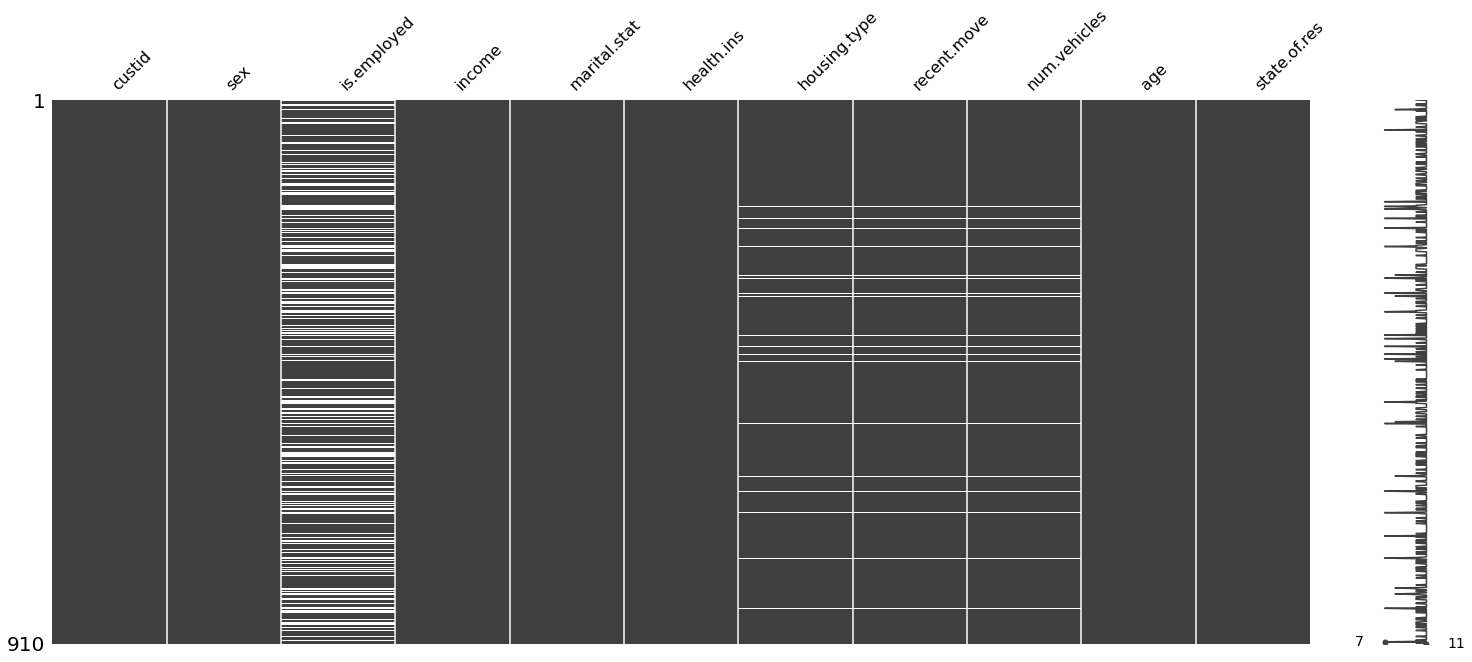

In [11]:
msno.matrix(custdata);

#### Note:

* *is.employed* is missing from may observations. *housing.type*, *recent.move* and *num.vehicles* are also missing from some observations, but there seems to be some pattern to it. We can create a heatmap of these missing values and confirm this pattern.

### Count or percentage of missing values

In [12]:
custdata.isnull().sum(axis=0)

custid            0
sex               0
is.employed     255
income            0
marital.stat      0
health.ins        0
housing.type     31
recent.move      31
num.vehicles     31
age               0
state.of.res      0
dtype: int64

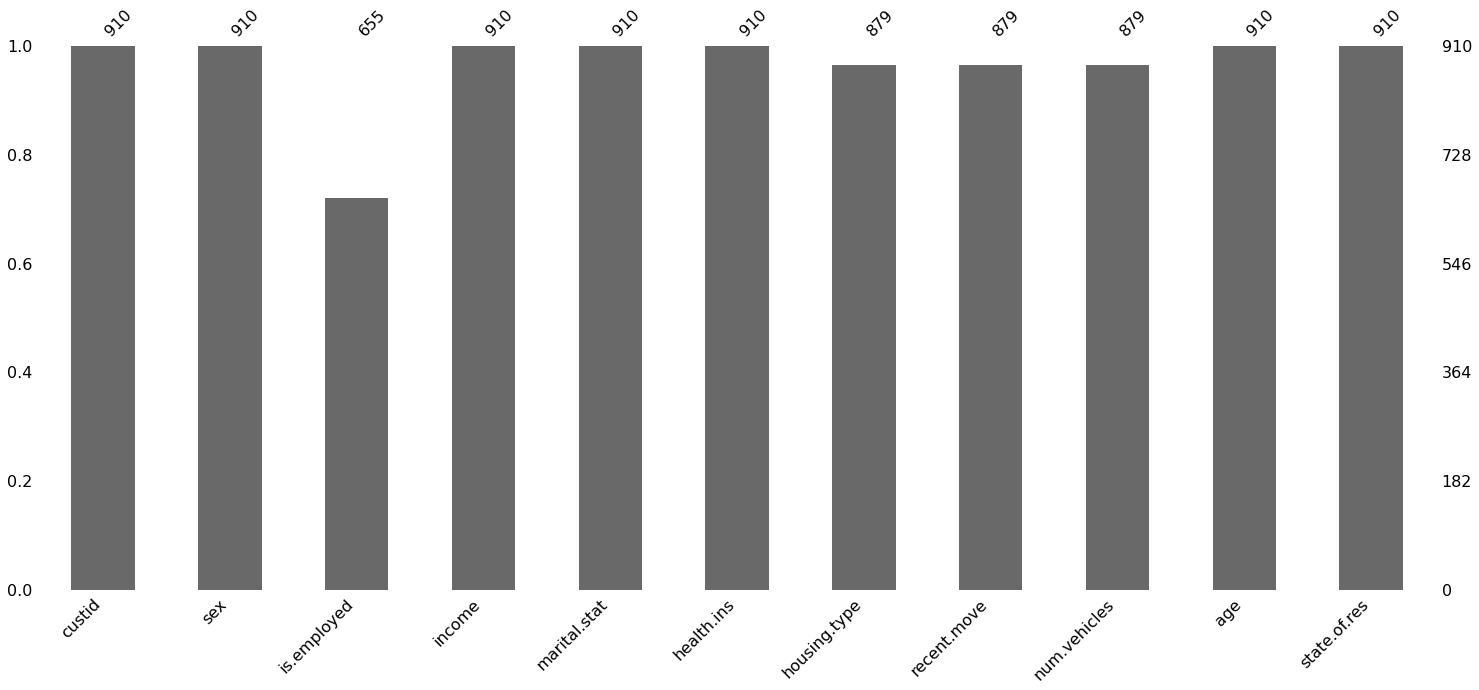

In [13]:
msno.bar(custdata);

## Why data is missing?

* There can be multiple reasons, why data is missing.

    * Data is not available at the time of capturing
    * It could be recording error, left empty intentionally or unintentionally

* In this example, quite a lot of observations have missing data in *is.employed* column. 

* This may be either because the person does not have an active/ full time job. So, at the time of capturing, it was not sure weather to capture it as an employment or not.

* So, there are multiple steps that can be taken

    1. Remove the rows from the dataset
    2. Impute the column as not employed i.e. false.
    3. Impute with most occurring values or average values
    4. Look at the missing column with respect to other columns data to infer any relationships.

* We can look at this column in relation to the income and age. We can assume people to be employed if they have some income.

### Remove Null values from dataset

* All columns with null values can be removed from the dataset. Remove all observations where at least one data element is missing. 

In [14]:
cust_clean = custdata.dropna()

<AxesSubplot:>

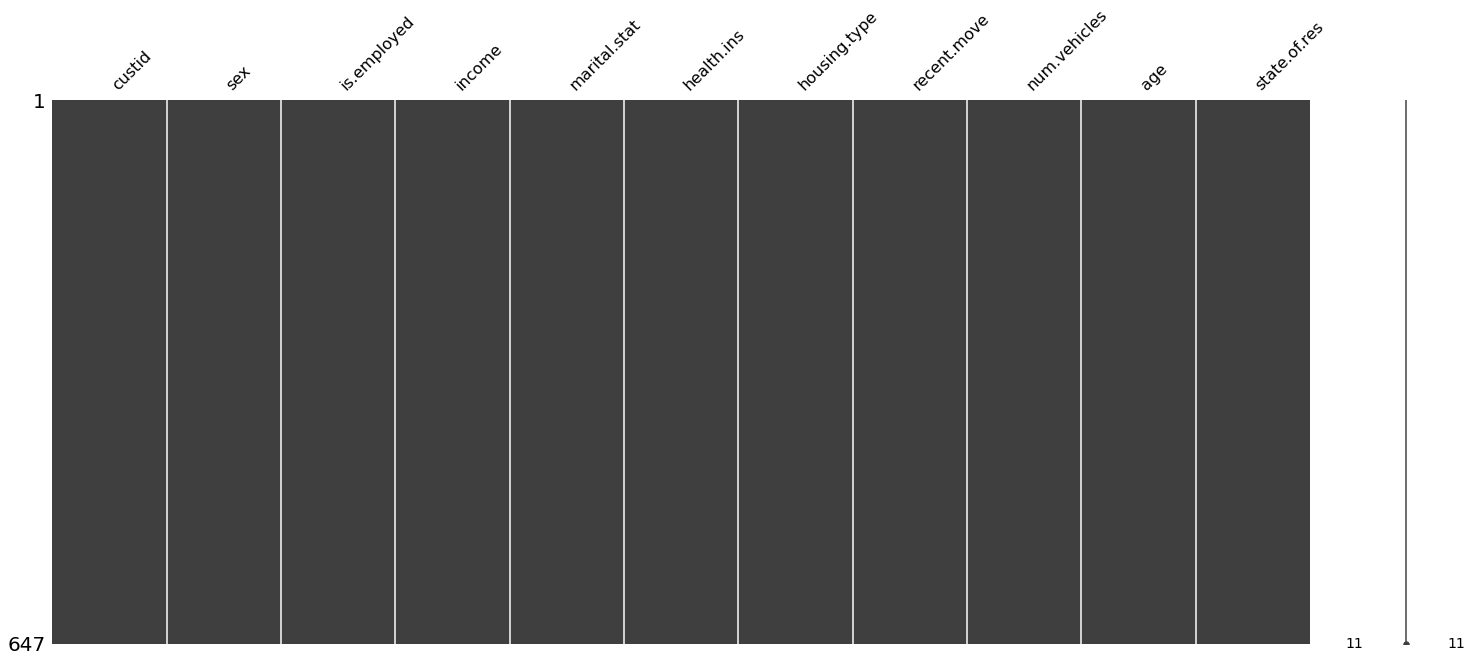

In [15]:
msno.matrix(cust_clean)

### Remove null values of a specific column

* For example, only removing those observations where *is.employed* data is missing.

In [16]:
cust_clean = custdata.dropna(subset=['is.employed'])

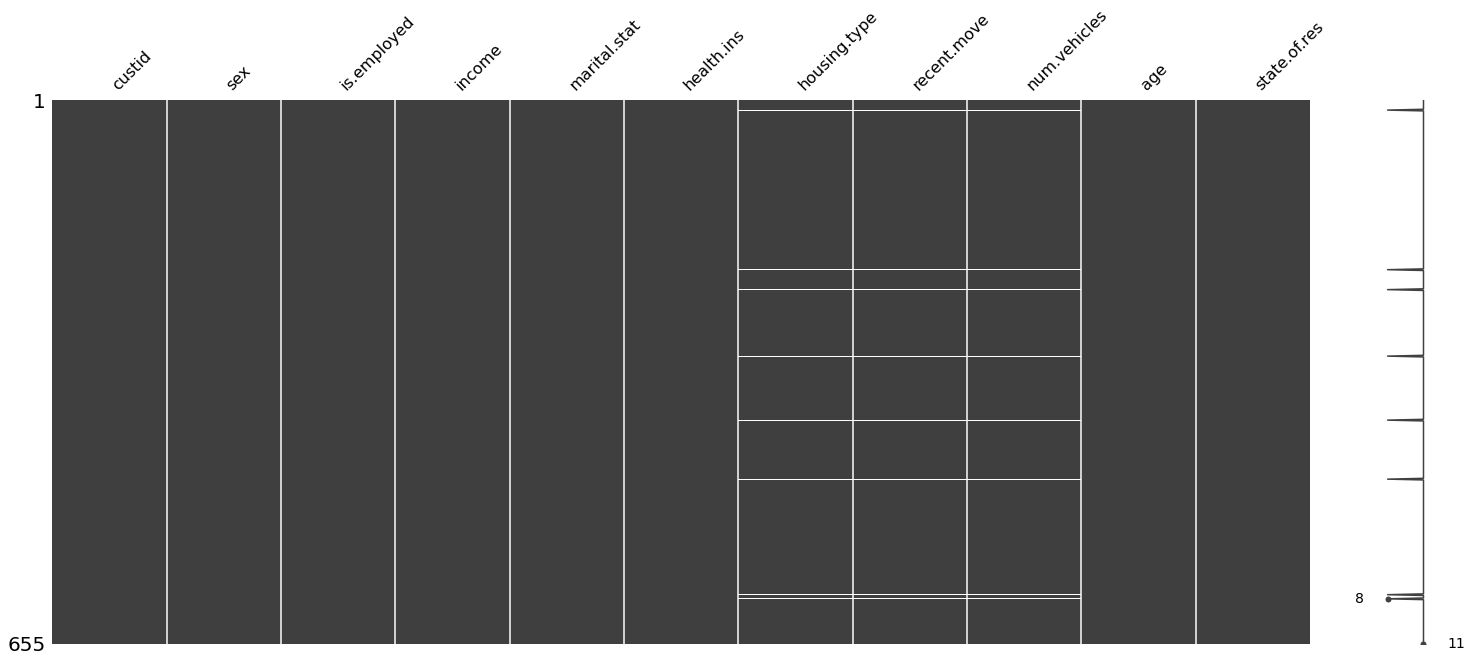

In [17]:
msno.matrix(cust_clean);

### Impute Null values

* Replace all null values in *is.employed* column with False 

In [18]:
custdata['is.employed_IS1'] = custdata['is.employed'].fillna(True)

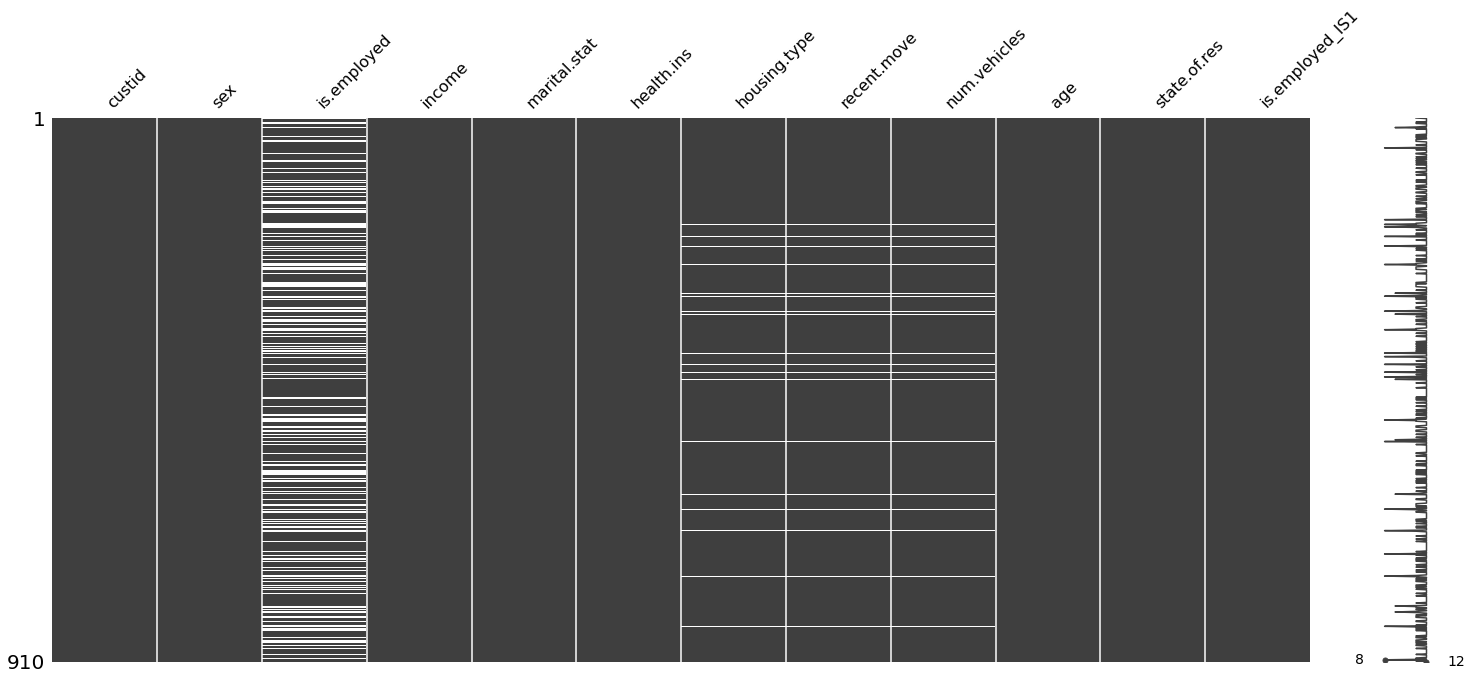

In [19]:
msno.matrix(custdata);

### Imputing with most occurring value 

* Replace with most occurring value.


In [27]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')

imp_col = imp.fit_transform(custdata[['is.employed']])

In [28]:
custdata[["is.employed", "is.employed_IS2"]][0:10]

,is.employed,is.employed_IS2
0,NaN,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,NaN,True
8,True,True
9,NaN,True


### Why the fields are null?

* Are the fields missing in certain scenarios. Can we infer the value of these fields from values of other existing columns in those observations. We can explore and find out. This will need prior knowledge of the data and the domain.

In [29]:
cust_employed_null = custdata[ custdata["is.employed"].isnull() ]

In [30]:
cust_employed_null[0:10]

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employed_IS1,is.employed_IS2
0,2068,F,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49,Michigan,True,True
7,14989,M,NaN,9400,Married,True,Rented,False,2.0,44,Illinois,True,True
9,16551,F,NaN,7000,Married,True,Homeowner with mortgage/loan,False,2.0,46,Georgia,True,True
15,25863,M,NaN,41000,Divorced/Separated,True,Homeowner with mortgage/loan,False,1.0,70,Virginia,True,True
18,27214,M,NaN,18800,Married,True,Homeowner free and clear,False,2.0,68,Ohio,True,True
28,38827,F,NaN,9700,Married,True,Homeowner with mortgage/loan,False,2.0,72,Oklahoma,True,True
30,40449,M,NaN,13000,Married,True,Homeowner free and clear,False,3.0,84,Kentucky,True,True
31,42374,M,NaN,7800,Never Married,True,Homeowner free and clear,False,1.0,65,Kentucky,True,True
33,46791,M,NaN,22700,Married,True,Homeowner free and clear,False,2.0,67,Oklahoma,True,True
36,49496,M,NaN,94400,Widowed,True,Homeowner free and clear,False,2.0,88,Wisconsin,True,True


#### Note:

* It seems persons who are old i.e. around 60 or more, and homeowners without mortgage have missing values in *is.employed* column. These could be because they are retirees and have an income from investments. So, we can fill *is.employed* as False. But before that let's look at those observations with *is.employed* as False.

### Is *is.employed* missing below a certain income level?

In [31]:
cust_employed_null[cust_employed_null.income < 2000 ]

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employed_IS1,is.employed_IS2
50,68013,M,NaN,100,Divorced/Separated,False,NaN,NaN,NaN,28,California,True,True
117,158530,M,NaN,1400,Married,True,Homeowner with mortgage/loan,False,1.0,83,Texas,True,True
131,181385,F,NaN,290,Married,False,Homeowner free and clear,False,2.0,28,Wisconsin,True,True
178,259807,M,NaN,440,Married,True,NaN,NaN,NaN,49,West Virginia,True,True
182,268667,M,NaN,200,Never Married,True,NaN,NaN,NaN,31,Pennsylvania,True,True
433,668750,F,NaN,1200,Never Married,False,NaN,NaN,NaN,24,Texas,True,True
505,799565,M,NaN,1600,Never Married,False,NaN,NaN,NaN,23,Pennsylvania,True,True
541,846713,M,NaN,250,Never Married,True,NaN,NaN,NaN,45,Florida,True,True
581,892483,M,NaN,100,Married,True,Homeowner with mortgage/loan,False,3.0,68,Minnesota,True,True
671,1034979,F,NaN,750,Never Married,True,Rented,False,1.0,38,Indiana,True,True


### Custom function to populate missing values

* This is just a sample program. The logic implemented here is only for demonstration. The logic can be customized as per the understanding of data and the best machanism to populate missing values.

In [32]:
import math 

def impute_is_employed( employed, age, income ):
    
    if not math.isnan( employed ):
        return employed
    else:
        if age > 60:
            return False
        elif income > 2000:        
            return True
        else:
            return False

In [33]:
custdata["is.employed_IS3"] = custdata.apply( lambda rec: 
                                             impute_is_employed( rec["is.employed"],
                                                                rec.age,
                                                                rec.income ), 
                                             axis = 1 )

In [34]:
custdata[["age", "income", "is.employed", "is.employed_IS3"]].head( 5 )

,age,income,is.employed,is.employed_IS3
0,49,11300,NaN,True
1,22,4500,True,True
2,22,20000,True,True
3,31,12000,True,True
4,40,180000,True,True


### Imputing Number of Vehicles

* *num.vehicles* is a numerical variable and is a discrete variable. An imputation strategy of mean or median can be adopted for the missing values of this column.

In [35]:
custdata['numvehicles_IS1'] = custdata['num.vehicles'].fillna(0)

In [36]:
custdata[custdata.income < 1000 ][0:5]

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employed_IS1,is.employed_IS2,is.employed_IS3,numvehicles_IS1
50,68013,M,NaN,100,Divorced/Separated,False,NaN,NaN,NaN,28,California,True,True,False,0.0
131,181385,F,NaN,290,Married,False,Homeowner free and clear,False,2.0,28,Wisconsin,True,True,False,2.0
178,259807,M,NaN,440,Married,True,NaN,NaN,NaN,49,West Virginia,True,True,False,0.0
182,268667,M,NaN,200,Never Married,True,NaN,NaN,NaN,31,Pennsylvania,True,True,False,0.0
293,456859,M,True,80,Never Married,True,NaN,NaN,NaN,18,California,True,True,True,0.0


### Using KNN Imputation Strategy

* Using KNN, the missing data can be filled using nearest neighbourhood observations. The nearest neighbours can be found using available values in other columns. For example, we can compute the missing num_vehicles by using income, age, housing.type etc. 

In [37]:
from sklearn.impute import KNNImputer

In [58]:
num_vehicle_df = custdata[['age', 'income', 'num.vehicles']]

For example, let's say number of vehicles can be determined by age and income. The missing values can be determined using age and income fields. If persons with similar age and income having cars, then the missing values can be imputed to similar number of cars. 

In [59]:
knn_imputer = KNNImputer(n_neighbors=5)

In [60]:
num_vehicle_df['numvehicles_IS2'] = knn_imputer.fit_transform(num_vehicle_df)[:, 2]

In [61]:
custdata['numvehicles_IS2'] = np.round(num_vehicle_df['numvehicles_IS2'], 0)

In [63]:
custdata[custdata['num.vehicles'].isnull()][['age', 
                                             'income',
                                             'num.vehicles', 
                                             'numvehicles_IS2']].sample(5)

,age,income,num.vehicles,numvehicles_IS2
766,26,7200,NaN,2.0
816,20,8000,NaN,1.0
245,55,24800,NaN,2.0
433,24,1200,NaN,2.0
16,28,30000,NaN,2.0


## Encoding Categorical Features

* Categorical features need to be represented as numerical values before it can be used in buidling a model. Pandas has **get_dummies()** function to create these features. Each category present in the categorical variable need to converted into a feature.

In [64]:
pd.unique( custdata.sex )

array(['F', 'M'], dtype=object)

In [65]:
custdata = pd.get_dummies( custdata, columns = ['sex'], drop_first = True )

In [66]:
custdata[0:5]

,custid,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employed_IS1,is.employed_IS2,is.employed_IS3,numvehicles_IS1,numvehicles_IS2,sex_M
0,2068,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49,Michigan,True,True,True,2.0,2.0,0
1,2848,True,4500,Never Married,False,Rented,True,3.0,22,Georgia,True,True,True,3.0,3.0,1
2,5641,True,20000,Never Married,False,Occupied with no rent,False,0.0,22,New Mexico,True,True,True,0.0,0.0,1
3,6369,True,12000,Never Married,True,Rented,True,1.0,31,Florida,True,True,True,1.0,1.0,0
4,8322,True,180000,Never Married,True,Homeowner with mortgage/loan,False,1.0,40,New York,True,True,True,1.0,1.0,0


In [67]:
pd.unique( custdata["marital.stat"] )

array(['Married', 'Never Married', 'Divorced/Separated', 'Widowed'],
      dtype=object)

In [68]:
custdata = pd.get_dummies( custdata, columns = ['marital.stat'] )
custdata[0:5]

,custid,is.employed,income,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employed_IS1,is.employed_IS2,is.employed_IS3,numvehicles_IS1,numvehicles_IS2,sex_M,marital.stat_Divorced/Separated,marital.stat_Married,marital.stat_Never Married,marital.stat_Widowed
0,2068,NaN,11300,True,Homeowner free and clear,False,2.0,49,Michigan,True,True,True,2.0,2.0,0,0,1,0,0
1,2848,True,4500,False,Rented,True,3.0,22,Georgia,True,True,True,3.0,3.0,1,0,0,1,0
2,5641,True,20000,False,Occupied with no rent,False,0.0,22,New Mexico,True,True,True,0.0,0.0,1,0,0,1,0
3,6369,True,12000,True,Rented,True,1.0,31,Florida,True,True,True,1.0,1.0,0,0,0,1,0
4,8322,True,180000,True,Homeowner with mortgage/loan,False,1.0,40,New York,True,True,True,1.0,1.0,0,0,0,1,0


## Transforming the Variables

### Scaling or Normalizing the features

* If the features are on different scale, they need to be brought into same sclae for comparison or some models may require the features to be represented on similar scales e.g. clustering.

* Alternatively, the features can be normalized. Normalized values will always have a mean of 0 and standard deviation of 1.

* The following steps show how to scale and normalize the data.

In [71]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   custid                           910 non-null    int64  
 1   is.employed                      655 non-null    object 
 2   income                           910 non-null    float64
 3   health.ins                       910 non-null    bool   
 4   housing.type                     879 non-null    object 
 5   recent.move                      879 non-null    object 
 6   num.vehicles                     879 non-null    float64
 7   age                              910 non-null    int64  
 8   state.of.res                     910 non-null    object 
 9   is.employed_IS1                  910 non-null    bool   
 10  is.employed_IS2                  910 non-null    bool   
 11  is.employed_IS3                  910 non-null    bool   
 12  numvehicles_IS1       

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
std_scaler.fit_transform( custdata[['income', 'age']] )

array([[-0.70342085, -0.16341185],
       [-0.80654424, -1.71062921],
       [-0.57148357, -1.71062921],
       ...,
       [-0.2909273 , -1.30949878],
       [-0.21661779,  2.07145768],
       [-0.55783489, -0.90836835]])

In [73]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit_transform( custdata[['income', 'age']] )

array([[0.0183261 , 0.41333333],
       [0.00726865, 0.05333333],
       [0.03247313, 0.05333333],
       ...,
       [0.0625559 , 0.14666667],
       [0.07052377, 0.93333333],
       [0.03393661, 0.24      ]])

## Binning of Data

* Sometimes a continuous variable may need to be binned into categories. And then the categories can be used build a model. For example, age. Sometimes it may make sense to divide the ages into ranges and then create categories like young, adult, midage & old. To understand that the spread of the variable need to be looked into and then bin into a specific number of categories. For example, income can be categorized into low-income, middle-income and high-income etc.

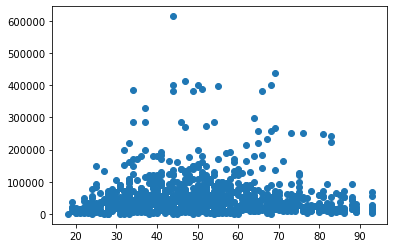

In [75]:
plt.scatter( custdata.age, custdata.income )

<AxesSubplot:xlabel='age', ylabel='Density'>

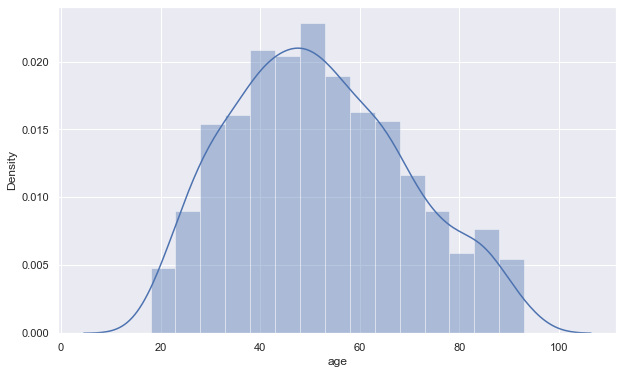

In [76]:
sn.set(rc={"figure.figsize": (10, 6)}); 
sn.distplot( custdata.age )

In [77]:
bins = [0,18, 35, 60,120]
group_names = ['young', 'adult', 'midage', 'old']

custdata['age_cat'] = pd.cut(custdata['age'], bins, labels=group_names)

In [78]:
custdata[["age", "age_cat"]][0:10]

,age,age_cat
0,49,midage
1,22,adult
2,22,adult
3,31,adult
4,40,midage
5,39,midage
6,48,midage
7,44,midage
8,70,old
9,46,midage


In [79]:
custdata = pd.get_dummies(custdata, columns = ['age_cat'])

In [80]:
custdata[0:10]

,custid,is.employed,income,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employed_IS1,...,numvehicles_IS2,sex_M,marital.stat_Divorced/Separated,marital.stat_Married,marital.stat_Never Married,marital.stat_Widowed,age_cat_young,age_cat_adult,age_cat_midage,age_cat_old
0,2068,NaN,11300.0,True,Homeowner free and clear,False,2.0,49,Michigan,True,...,2.0,0,0,1,0,0,0,0,1,0
1,2848,True,4500.0,False,Rented,True,3.0,22,Georgia,True,...,3.0,1,0,0,1,0,0,1,0,0
2,5641,True,20000.0,False,Occupied with no rent,False,0.0,22,New Mexico,True,...,0.0,1,0,0,1,0,0,1,0,0
3,6369,True,12000.0,True,Rented,True,1.0,31,Florida,True,...,1.0,0,0,0,1,0,0,1,0,0
4,8322,True,180000.0,True,Homeowner with mortgage/loan,False,1.0,40,New York,True,...,1.0,0,0,0,1,0,0,0,1,0
5,8521,True,120000.0,True,Homeowner free and clear,True,1.0,39,Idaho,True,...,1.0,1,0,0,1,0,0,0,1,0
6,12195,True,40000.0,True,Rented,False,3.0,48,Michigan,True,...,3.0,1,0,1,0,0,0,0,1,0
7,14989,NaN,9400.0,True,Rented,False,2.0,44,Illinois,True,...,2.0,1,0,1,0,0,0,0,1,0
8,15917,True,24000.0,True,Homeowner free and clear,False,1.0,70,North Carolina,True,...,1.0,0,1,0,0,0,0,0,0,1
9,16551,NaN,7000.0,True,Homeowner with mortgage/loan,False,2.0,46,Georgia,True,...,2.0,0,0,1,0,0,0,0,1,0


In [81]:
custdata.columns

Index(['custid', 'is.employed', 'income', 'health.ins', 'housing.type',
       'recent.move', 'num.vehicles', 'age', 'state.of.res', 'is.employed_IS1',
       'is.employed_IS2', 'is.employed_IS3', 'numvehicles_IS1',
       'numvehicles_IS2', 'sex_M', 'marital.stat_Divorced/Separated',
       'marital.stat_Married', 'marital.stat_Never Married',
       'marital.stat_Widowed', 'age_cat_young', 'age_cat_adult',
       'age_cat_midage', 'age_cat_old'],
      dtype='object')

# Exercise

* Impute the variables houshing.type, recent.move using most_frequent strategy.
* Transform categorical variables houshing.type, recent.move into numerical dummy feature.
* Bin income column into three categories: low-income, mid-income and high-income.